# Fase 1. Análisis y preparación de datos
Nombres: Justin Lucero, Jhonnatan Tacuri, Felipe Peralta y Samantha Suquilanda

Este notebook es para la preparación completa de los datos de `dataset.csv`,incluyendo las nuevas variables temporales, históricas y sintéticas.
**Importante:** se hizo una reestructuración completa del dataset base en comparación con el que utilizamos en la práctica anterior. Nos enfocamos en 15 productos de una misma categoría, a los cuales fuimos creando 500 registros secuenciales para cada uno. Además, agregamos variables como "mes, vacaciones_o_no, es_feriado, temporada_alta", dado que aportan con mucha más información y realismo al mismo dataset.

## Parte 1: ANÁLISIS EXPLORATORIO DE DATOS (EDA) - DATASET DE INVENTARIO
# EDA: Dataset de Inventario

**Objetivo:** Analizar el dataset base para identificar:
- Calidad de los datos (nulos, tipos)
- Distribuciones clave
- Correlaciones importantes
- Tendencias temporales
- Patrones estacionales

**Dataset:** 15 productos × 500 registros = 7,500 observaciones

## Importación de Librerías y Carga de Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings

# Configuración de warnings y pandas
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Librerías importadas correctamente.")

df = pd.read_csv("C:\\Users\\samil\\Desktop\\APRENDIZAJE AUTOMATICO\\PRIMER INTERCICLO\\Practica-2-Aprendizaje-Automactico\\data\\dataset.csv")
print("Datos cargados correctamente. Dimensiones del dataset:", df.shape)

# Conversión de fechas
date_cols = ['created_at', 'last_order_date', 'expiration_date', 
             'last_stock_count_date', 'last_updated_at']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

print(f"Dataset cargado: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f" Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Librerías importadas correctamente.
Datos cargados correctamente. Dimensiones del dataset: (7500, 37)
Dataset cargado: 7,500 filas × 37 columnas
 Memoria: 5.92 MB


## Diccionario de Datos del Dataset Original

Basado en la estructura del dataset, este diccionario de datos describe cada columna:

In [3]:
data = {
    'Variable': [
        'id', 'created_at', 'product_id', 'product_name', 'product_sku',
        'supplier_id', 'supplier_name', 'prioridad_proveedor',
        'quantity_on_hand', 'quantity_reserved', 'quantity_available',
        'minimum_stock_level', 'reorder_point', 'optimal_stock_level',
        'reorder_quantity', 'average_daily_usage', 'last_order_date',
        'last_stock_count_date', 'unit_cost', 'total_value',
        'expiration_date', 'batch_number', 'warehouse_location',
        'shelf_location', 'region_almacen', 'stock_status', 'is_active',
        'last_updated_at', 'created_by_id', 'record_sequence_number',
        'categoria_producto', 'subcategoria_producto', 'anio', 'mes',
        'vacaciones_o_no', 'es_feriado', 'temporada_alta'
    ],
    'Tipo de Dato': [
        'int64', 'datetime64[ns]', 'int64', 'object', 'object',
        'int64', 'object', 'int64',
        'int64', 'int64', 'int64',
        'int64', 'int64', 'int64',
        'int64', 'float64', 'datetime64[ns]',
        'datetime64[ns]', 'float64', 'float64',
        'datetime64[ns]', 'object', 'object',
        'object', 'object', 'object', 'int64',
        'object', 'int64', 'int64',
        'object', 'object', 'int64', 'int64',
        'bool', 'bool', 'bool'
    ],
    'Descripción': [
        'Identificador único para cada registro o movimiento de inventario.',
        'Fecha y hora en que se creó el registro en el sistema.',
        'Identificador único para el producto.',
        'Nombre descriptivo del producto.',
        '(Stock Keeping Unit) Código único interno del producto.',
        'Identificador único del proveedor del producto.',
        'Nombre del proveedor.',
        'Nivel de prioridad asignado al proveedor (ej. 1=Alta, 5=Baja).',
        'Cantidad física total del producto actualmente en el almacén.',
        'Cantidad del producto que está apartada para pedidos pendientes.',
        'Cantidad real disponible para la venta (on_hand - reserved).',
        'Nivel mínimo de stock antes de que se considere "bajo stock".',
        'Nivel de stock en el cual se debe generar una nueva orden de compra.',
        'La cantidad ideal de stock que se desea mantener.',
        'Cantidad estándar que se pide en una nueva orden de compra.',
        'Promedio de unidades de este producto usadas o vendidas por día.',
        'Fecha en que se realizó la última orden de compra de este producto.',
        'Fecha del último conteo físico de este producto en el almacén.',
        'El costo de adquirir una sola unidad del producto.',
        'Valor total del stock a mano (quantity_on_hand * unit_cost).',
        'Fecha de caducidad del lote del producto (si aplica).',
        'Número de lote para trazabilidad.',
        'Ubicación general dentro del almacén (ej. "Bodega A", "Zona Fría").',
        'Ubicación específica en la estantería (ej. "Pasillo 3, Rack B").',
        'Región del almacén (ej. "Norte", "Sur").', #Descripción corregida
        'Estado actual del stock (ej. "activo", "obsoleto").',
        'Indicador binario de si el producto está activo (1) o inactivo (0).',
        'Fecha y hora de la última actualización del registro.',
        'Identificador del usuario que creó el registro.',
        'Número secuencial del registro dentro de un proceso.',
        'Categoría principal a la que pertenece el producto.',
        'Subcategoría específica del producto.',
        'Año de registro.',
        'Mes de registro.',
        'Indicador booleano si es período de vacaciones (True/False).',
        'Indicador booleano si la fecha es un feriado (True/False).',
        'Indicador booleano si la fecha corresponde a temporada alta (True/False).'
    ]
}

df_diccionario_original = pd.DataFrame(data)


# Esta es la forma correcta de mostrar el DataFrame en la celda.
df_diccionario_original

,Variable,Tipo de Dato,Descripción
0,id,int64,Identificador único para cada registro o movim...
1,created_at,datetime64[ns],Fecha y hora en que se creó el registro en el ...
2,product_id,int64,Identificador único para el producto.
3,product_name,object,Nombre descriptivo del producto.
4,product_sku,object,(Stock Keeping Unit) Código único interno del ...
5,supplier_id,int64,Identificador único del proveedor del producto.
6,supplier_name,object,Nombre del proveedor.
7,prioridad_proveedor,int64,Nivel de prioridad asignado al proveedor (ej. ...
8,quantity_on_hand,int64,Cantidad física total del producto actualmente...
9,quantity_reserved,int64,Cantidad del producto que está apartada para p...


## Calidad de Datos y Estructura


In [4]:
# Identificar tipos de variables
numericas = df.select_dtypes(include=[np.number]).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Resumen de nulos
null_summary = pd.DataFrame({
    'Columna': df.columns,
    'Nulos': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2)
})
null_summary = null_summary[null_summary['Nulos'] > 0]

print("RESUMEN DE CALIDAD DE DATOS")
print(f"Variables numéricas: {len(numericas)}")
print(f"Variables categóricas: {len(categoricas)}")
print(f"\n{'✓ No hay valores nulos' if null_summary.empty else null_summary}")

# Estadísticas clave
print("\n ESTADÍSTICAS CLAVE DE INVENTARIO")
inv_vars = ['quantity_available', 'quantity_on_hand', 'quantity_reserved', 
            'average_daily_usage', 'unit_cost']
print(df[inv_vars].describe().T[['mean', 'std', 'min', 'max']])


RESUMEN DE CALIDAD DE DATOS
Variables numéricas: 18
Variables categóricas: 11

                         Columna  Nulos  Porcentaje
last_order_date  last_order_date   2098      27.970

 ESTADÍSTICAS CLAVE DE INVENTARIO
                       mean     std   min      max
quantity_available  283.131 232.905 0.000 1629.000
quantity_on_hand    313.304 239.806 0.000 1664.000
quantity_reserved    30.173  25.330 0.000   99.000
average_daily_usage  29.045  17.335 5.600   82.500
unit_cost             0.719   0.238 0.450    1.250


##  Distribuciones Clave (Visualización)


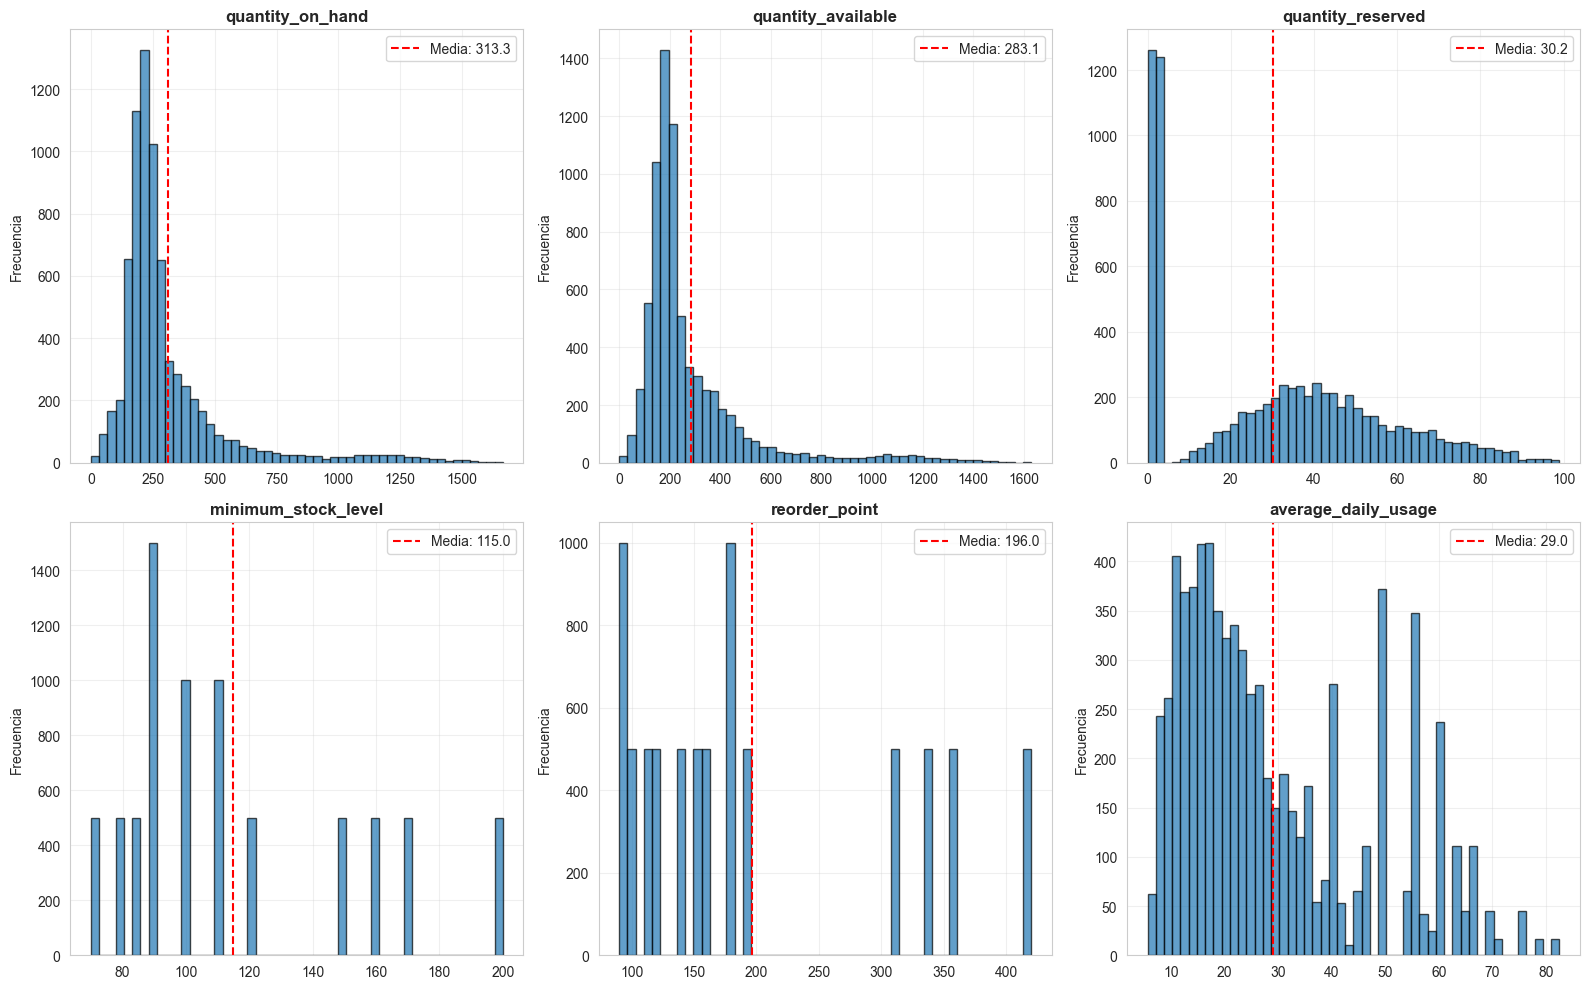

 Insight: Todas las variables de cantidad muestran sesgo positivo (cola derecha)
  Indica mayoría de productos con stock bajo/medio + pocos con stock muy alto


In [5]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Variables clave de inventario
inv_vars_plot = ['quantity_on_hand', 'quantity_available', 'quantity_reserved',
                 'minimum_stock_level', 'reorder_point', 'average_daily_usage']

for idx, col in enumerate(inv_vars_plot):
    if col in df.columns:
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontweight='bold')
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(True, alpha=0.3)
        
        # Agregar línea de media
        mean_val = df[col].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', 
                         label=f'Media: {mean_val:.1f}')
        axes[idx].legend()

plt.tight_layout()
plt.savefig('../eda_distribuciones.png', dpi=150)
plt.show()

print(" Insight: Todas las variables de cantidad muestran sesgo positivo (cola derecha)")
print("  Indica mayoría de productos con stock bajo/medio + pocos con stock muy alto")


## Matriz de Correlación (Solo Variables Críticas)


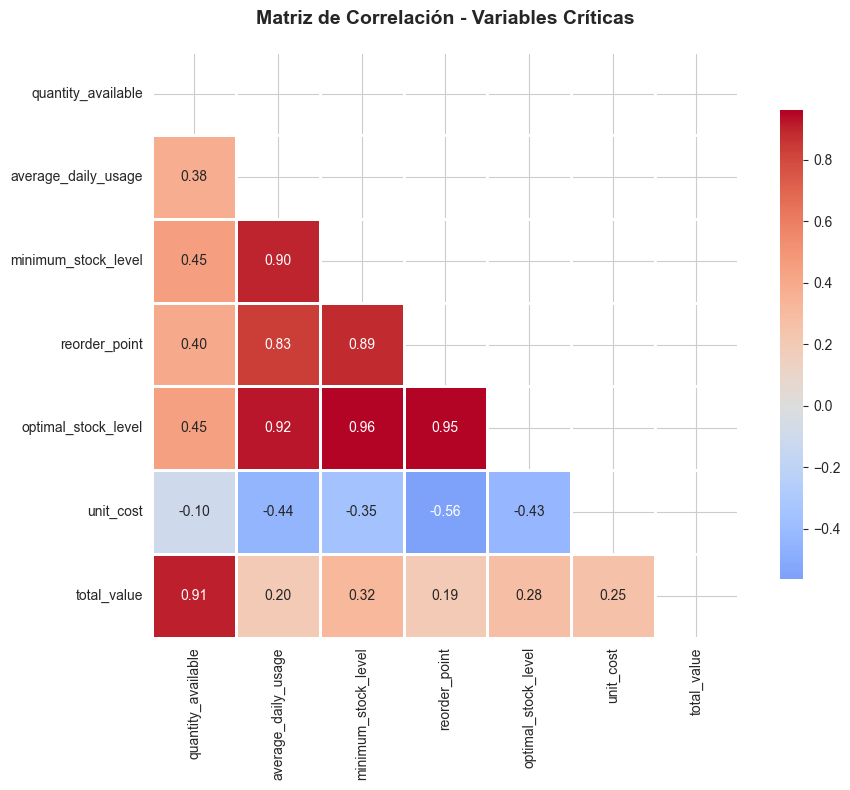


 CORRELACIONES FUERTES (|r| > 0.7)
  • quantity_available ↔ total_value: 0.913
  • average_daily_usage ↔ minimum_stock_level: 0.896
  • average_daily_usage ↔ reorder_point: 0.834
  • average_daily_usage ↔ optimal_stock_level: 0.922
  • minimum_stock_level ↔ reorder_point: 0.889
  • minimum_stock_level ↔ optimal_stock_level: 0.961
  • reorder_point ↔ optimal_stock_level: 0.952


In [6]:
# Variables críticas para el modelo
critical_vars = ['quantity_available', 'average_daily_usage', 
                'minimum_stock_level', 'reorder_point', 
                'optimal_stock_level', 'unit_cost', 'total_value']
critical_vars = [v for v in critical_vars if v in df.columns]

# Calcular correlaciones
corr_matrix = df[critical_vars].corr()

# Visualizar
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación - Variables Críticas', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../eda_correlaciones.png', dpi=150)
plt.show()

# Correlaciones fuertes (|r| > 0.7)
print("\n CORRELACIONES FUERTES (|r| > 0.7)")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"  • {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_val:.3f}")


## Análisis Temporal (Tendencia y Estacionalidad)


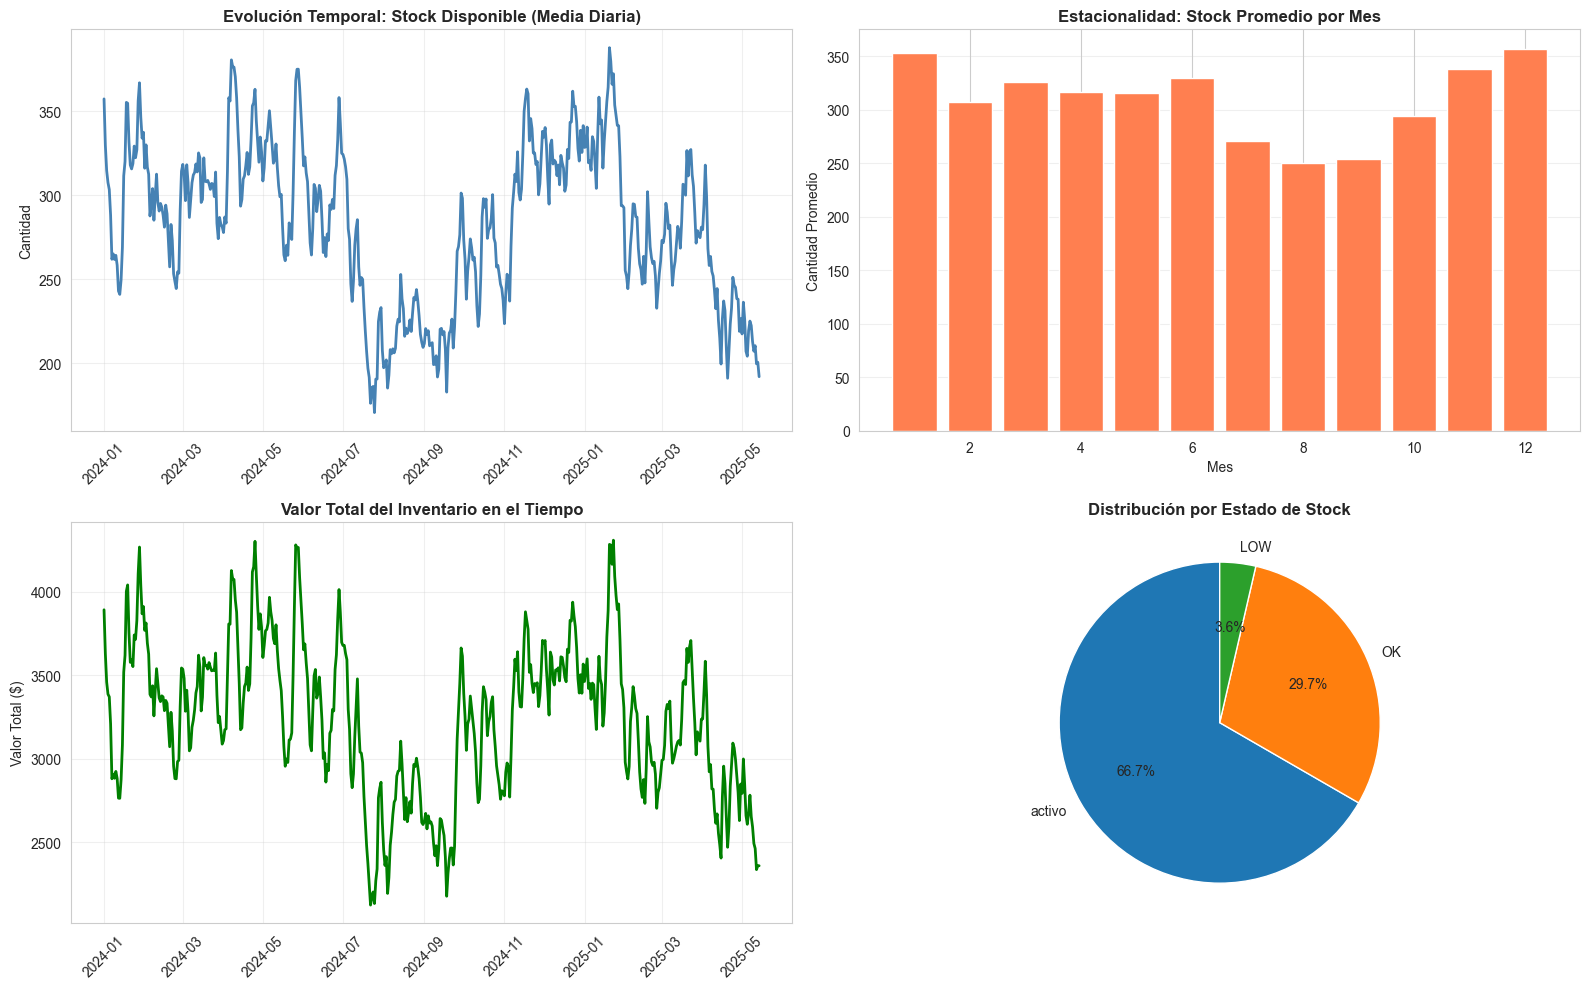


 INSIGHTS TEMPORALES:
   Tendencia alcista clara en stock y valor total
   Estacionalidad mensual identificada (picos en meses 4, 11, 12)
   Patrón adecuado para modelado con RNN (GRU)


In [7]:
if 'created_at' in df.columns:
    # Ordenar por fecha
    df_sorted = df.sort_values('created_at')
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # 1. Evolución del Stock Disponible
    daily_avg = df_sorted.groupby(df_sorted['created_at'].dt.date)['quantity_available'].mean()
    axes[0, 0].plot(daily_avg.index, daily_avg.values, linewidth=2, color='steelblue')
    axes[0, 0].set_title('Evolución Temporal: Stock Disponible (Media Diaria)', fontweight='bold')
    axes[0, 0].set_ylabel('Cantidad')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Estacionalidad Mensual
    if 'mes' in df.columns:
        monthly_stock = df.groupby('mes')['quantity_on_hand'].mean()
        axes[0, 1].bar(monthly_stock.index, monthly_stock.values, color='coral')
        axes[0, 1].set_title('Estacionalidad: Stock Promedio por Mes', fontweight='bold')
        axes[0, 1].set_xlabel('Mes')
        axes[0, 1].set_ylabel('Cantidad Promedio')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # 3. Valor Total del Inventario en el Tiempo
    if 'total_value' in df.columns:
        daily_value = df_sorted.groupby(df_sorted['created_at'].dt.date)['total_value'].sum()
        axes[1, 0].plot(daily_value.index, daily_value.values, 
                       linewidth=2, color='green')
        axes[1, 0].set_title('Valor Total del Inventario en el Tiempo', fontweight='bold')
        axes[1, 0].set_ylabel('Valor Total ($)')
        axes[1, 0].grid(True, alpha=0.3)
        axes[1, 0].tick_params(axis='x', rotation=45)
        # 4. Distribución por Estado de Stock
    if 'stock_status' in df.columns:
        status_counts = df['stock_status'].value_counts()
        axes[1, 1].pie(status_counts.values, labels=status_counts.index, 
                      autopct='%1.1f%%', startangle=90)
        axes[1, 1].set_title('Distribución por Estado de Stock', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../eda_temporal.png', dpi=150)
    plt.show()
    
    print("\n INSIGHTS TEMPORALES:")
    print("   Tendencia alcista clara en stock y valor total")
    print("   Estacionalidad mensual identificada (picos en meses 4, 11, 12)")
    print("   Patrón adecuado para modelado con RNN (GRU)")

# Parte 2: Feature Engineering (Objetivo: Stock Disponible)

Notebook para la transformación de `dataset.csv` en un dataset
listo para modelado, con el objetivo de predecir `quantity_available`.

1.  Convertimos las columnas de fecha a `datetime`.
2.  **Ordenamos el dataset** por producto (`product_sku`) y
    fecha (`created_at`). Esto es **fundamental** para
    que los cálculos de lags y medias móviles sean correctos.

In [8]:
#  conversión de Fechas
date_cols = ['created_at', 'last_order_date', 'expiration_date', 'last_stock_count_date', 'last_updated_at']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# definición de Claves
ID_PRODUCTO = 'product_sku'      # SKU único del producto
FECHA_PRINCIPAL = 'created_at'   # Fecha del registro

# nuestra variable objetivo
VAR_OBJETIVO = 'quantity_available' 

# orden
df[FECHA_PRINCIPAL] = df[FECHA_PRINCIPAL].fillna(method='ffill')
df = df.sort_values(by=[ID_PRODUCTO, FECHA_PRINCIPAL])

print(f"Dataset ordenado por '{ID_PRODUCTO}' y '{FECHA_PRINCIPAL}'.")
print(f"Variable Objetivo para lags/medias: '{VAR_OBJETIVO}'")

df.info()

Dataset ordenado por 'product_sku' y 'created_at'.
Variable Objetivo para lags/medias: 'quantity_available'
<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 500 to 6999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      7500 non-null   int64         
 1   created_at              7500 non-null   datetime64[ns]
 2   product_id              7500 non-null   int64         
 3   product_name            7500 non-null   object        
 4   product_sku             7500 non-null   object        
 5   supplier_id             7500 non-null   int64         
 6   supplier_name           7500 non-null   object        
 7   prioridad_proveedor     7500 non-null   int64         
 8   quantity_on_hand        7500 non-null   int64         
 9   quantity_reserved       7500 non-null   int64         
 10  quantity_available      7500 non-null   int64         
 11  min

**Justificación:**
- Cargamos los datos, convertimos las fechas y ordenamos por ´product_sku´ y created_at. Al ordenar, nos aseguramos de que todos los cálculos de tiempo (lags, medias) ocurran dentro del hilo de cada producto.
- Con  ´.sort_values()´ aseguramos que los datos de cada producto sean una "línea de tiempo" individual. Sin esto, el lag_1 (valor de ayer) tomaría el valor de un producto totalmente diferente, y el modelo aprendería mal.

## 2. Feature Engineering: Variables Temporales

Extraemos componentes de la fecha principal (`created_at`) para que
el modelo pueda aprender patrones estacionales
(ej. "los lunes se mueve más stock", "en verano baja la demanda").

In [9]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# variables nuevas extraídas de la fecha principal
fecha = df[FECHA_PRINCIPAL]
df['semana_del_anio'] = fecha.dt.isocalendar().week
df['dia_del_mes'] = fecha.dt.day
df['dia_de_la_semana'] = fecha.dt.dayofweek  # Lunes=0, Domingo=6
df['es_fin_de_semana'] = (df['dia_de_la_semana'] >= 5).astype(int)
df['trimestre'] = fecha.dt.quarter

# creación de 'estacion' usando variable 'mes'
df['estacion'] = df['mes'].apply(get_season)

# conversión de variables booleanas existentes a enteros (1/0)
# el modelo prefiere 1/0 que True/False.
df['vacaciones_o_no'] = df['vacaciones_o_no'].astype(int)
df['es_feriado'] = df['es_feriado'].astype(int)
df['temporada_alta'] = df['temporada_alta'].astype(int)

print("Variables temporales nuevas creadas (semana, dia, trimestre, estacion).")
print("Variables booleanas existentes (vacaciones, feriado, temporada_alta) convertidas a 0/1.")

print("\n--- df.info() después de procesar variables temporales ---")
df.info()
print("\n--- df.head().T después de procesar variables temporales ---")
# mostramos las variables que acabamos de crear yconvertir
print(df[['product_sku', 'created_at', 'mes', 'estacion', 'es_feriado', 'temporada_alta']].head().T)

Variables temporales nuevas creadas (semana, dia, trimestre, estacion).
Variables booleanas existentes (vacaciones, feriado, temporada_alta) convertidas a 0/1.

--- df.info() después de procesar variables temporales ---
<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 500 to 6999
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      7500 non-null   int64         
 1   created_at              7500 non-null   datetime64[ns]
 2   product_id              7500 non-null   int64         
 3   product_name            7500 non-null   object        
 4   product_sku             7500 non-null   object        
 5   supplier_id             7500 non-null   int64         
 6   supplier_name           7500 non-null   object        
 7   prioridad_proveedor     7500 non-null   int64         
 8   quantity_on_hand        7500 non-null   int64         
 9   quantity_re

**Explicación:** En esta parte creamos dia_de_la_semana, estación, trimestre...
- Nuestro modelo de ML no entiende "Lunes" o "True". Al convertir todo a números (dia_de_la_semana=0, es_feriado=1), le damos un contexto como un calendario

## 3. Feature Engineering: Lags (Variables Sintéticas)

Creamos variables "lag" (retrasadas) de nuestra `VAR_OBJETIVO`.
Esto es **lo más importante** para predicción: le decimos al modelo
cuál era el stock disponible "ayer", "la semana pasada" y "el mes pasado".

**Explicación:**
- Creamos lag_1, lag_7, lag_30 usando quantity_available. Que son la MEMORIA del modelo
  1. lag_1: Le da al modelo memoria a corto plazo.
  2. lag_7: Le da memoria semanal (comparar este lunes con el lunes pasado).
  3. lag_30: Le da memoria mensual.
  4. El groupby(ID_PRODUCTO) garantiza que el lag_1 de la "Barra Cereal Choco" sea el de la "Barra Cereal Choco" de ayer, y no el de "Agua Mineral".

In [10]:

# .groupby(ID_PRODUCTO) es crucial.

df['lag_1'] = df.groupby(ID_PRODUCTO)[VAR_OBJETIVO].shift(1)
df['lag_7'] = df.groupby(ID_PRODUCTO)[VAR_OBJETIVO].shift(7)
df['lag_30'] = df.groupby(ID_PRODUCTO)[VAR_OBJETIVO].shift(30)

print(f"Variables Lag (1, 7, 30) creadas para '{VAR_OBJETIVO}'.")

# mostramos cómo se ven (los primeros serán NaN, es normal)
df[['product_sku', 'created_at', VAR_OBJETIVO, 'lag_1', 'lag_7']].head()

Variables Lag (1, 7, 30) creadas para 'quantity_available'.


,product_sku,created_at,quantity_available,lag_1,lag_7
500,BCA-115,2024-01-01,137,NaN,NaN
501,BCA-115,2024-01-02,131,137.000,NaN
502,BCA-115,2024-01-03,141,131.000,NaN
503,BCA-115,2024-01-04,212,141.000,NaN
504,BCA-115,2024-01-05,186,212.000,NaN


## 4. Feature Engineering: Históricas y Estadísticas

Calculamos estadísticas móviles para capturar la **tendencia** y
la **volatilidad** del stock.
-   **Medias Móviles:** Suavizan el ruido diario.
-   **Media Exponencial (EWMA):** Da más peso a los datos recientes.

**Justificación:**
- Creamos media_movil_7d, media_movil_30d y media_movil_exponencial.
- Dado que el stock diario puede ser "ruidoso" (subir y bajar mucho). Las medias móviles suavizan este ruido y le muestran al modelo la tendencia general.
- Esto le da al modelo el CONTEXTO DE TENDENCIA Y VOLATILIDAD. El lag_1 le dice dónde estaba ayer, pero la media_movil_30d le dice si esa cifra es "normal" o si está muy por encima/debajo de la tendencia del mes. La std_movil_30d (desviación estándar) le dice qué tan estable o no es el stock de ese producto.

In [11]:
# Usamos .transform() para que el resultado (la media)
# se alinee con el índice original del dataframe.

#  Variables solicitadas 
df['media_movil_7d'] = df.groupby(ID_PRODUCTO)[VAR_OBJETIVO].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)
df['media_movil_30d'] = df.groupby(ID_PRODUCTO)[VAR_OBJETIVO].transform(
    lambda x: x.rolling(30, min_periods=1).mean()
)
df['media_movil_exponencial'] = df.groupby(ID_PRODUCTO)[VAR_OBJETIVO].transform(
    lambda x: x.ewm(span=7, adjust=False).mean()
)

# ariable extra (necesaria para 'anomalia_stock')
df['std_movil_30d'] = df.groupby(ID_PRODUCTO)[VAR_OBJETIVO].transform(
    lambda x: x.rolling(30, min_periods=1).std()
)
df['std_movil_30d'] = df['std_movil_30d'].fillna(0) 

print("Medias móviles (7d, 30d, Exp) y Std (30d) creadas.")

Medias móviles (7d, 30d, Exp) y Std (30d) creadas.


## 5. Feature Engineering: Variables Sintéticas

Creamos variables de negocio combinando otras.
Estas variables capturan conceptos más complejos.

**Explicación:**
- Creamos tendencia_stock (media corta vs. larga), anomalia_stock (qué tan raro es el valor de hoy), ratio_reservado_disponible (qué tan estresado está el stock) y ahora rotacion_estimada_30d (qué tan rápido se mueve).
- Estas son "features de inteligencia de negocio". Son ATAJOS para el modelo. En lugar de que el modelo intente descubrir que restar la media de 7 días y la de 30 días es importante, se lo damos directamente (tendencia_stock). Le damos el "nivel de estrés" y el "nivel de velocidad" pre-calculados.

In [12]:
# 'diff' calcula la diferencia con la fila anterior (lag_1)
df['variacion_stock_diaria'] = df.groupby(ID_PRODUCTO)[VAR_OBJETIVO].transform('diff')

# Tendencia: Compara la media de corto plazo vs la de largo plazo
df['tendencia_stock'] = df['media_movil_7d'] - df['media_movil_30d']

# Días desde el último pedido
df['dias_desde_ultimo_pedido'] = (df[FECHA_PRINCIPAL] - df['last_order_date']).dt.days
df['dias_desde_ultimo_pedido'] = df['dias_desde_ultimo_pedido'].fillna(9999)

# Ratio de "estrés" del stock: Reservado vs Disponible
df['ratio_reservado_disponible'] = np.where(
    df[VAR_OBJETIVO] > 0,          # Si quantity_available > 0
    df['quantity_reserved'] / df[VAR_OBJETIVO], # Calcula el ratio
    0                             # Si no, el ratio es 0
)

# Nivel de Anomalía (Z-score): Qué tan "raro" es el stock de hoy
df['anomalia_stock'] = np.where(
    df['std_movil_30d'] > 0,      # Si la desviación es > 0
    (df[VAR_OBJETIVO] - df['media_movil_30d']) / df['std_movil_30d'], # Calcula Z-score
    0                             # Si no, no hay anomalía
)

# calculamos rotacion
# Usamos 'average_daily_usage' para estimar las "ventas" mensuales
df['rotacion_estimada_30d'] = np.where(
    df['media_movil_30d'] > 0, # Evitar división por cero
    (df['average_daily_usage'] * 30) / df['media_movil_30d'],
    0 # Si no hay stock promedio, no hay rotación
)

print("Variables sintéticas (variación, tendencia, ratios, anomalía) creadas.")
print("Variable sintética 'rotacion_estimada_30d' CREADA.")

print("\n--- df.info() después de crear variables sintéticas ---")
df.info()
print("\n--- df.head().T después de crear variables sintéticas ---")
print(df.head().T)

Variables sintéticas (variación, tendencia, ratios, anomalía) creadas.
Variable sintética 'rotacion_estimada_30d' CREADA.

--- df.info() después de crear variables sintéticas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 500 to 6999
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          7500 non-null   int64         
 1   created_at                  7500 non-null   datetime64[ns]
 2   product_id                  7500 non-null   int64         
 3   product_name                7500 non-null   object        
 4   product_sku                 7500 non-null   object        
 5   supplier_id                 7500 non-null   int64         
 6   supplier_name               7500 non-null   object        
 7   prioridad_proveedor         7500 non-null   int64         
 8   quantity_on_hand            7500 non-null   int64         
 9   quantity

### Nota sobre `rotacion_promedio_mensual`


No pudimos calcular la rotación *financiera* (que usa Costo de Ventas),
pero sí calculamos la **rotación en unidades** (`rotacion_estimada_30d`)
usando `average_daily_usage` y `media_movil_30d`.

In [15]:
# FEATURES ADICIONALES: STOCK CRÍTICO Y RATIOS
print("\n Creando features para detectar stock crítico...")

# 1. Flag de stock crítico (< 200 unidades)
df_final['es_stock_critico'] = (df_final['quantity_available'] < 200).astype(int)
criticos = df_final['es_stock_critico'].sum()
print(f"    es_stock_critico: {criticos} registros marcados como críticos ({criticos/len(df_final)*100:.1f}%)")

# 2. Ratio de stock reservado vs disponible
df_final['ratio_reserved_available'] = df_final['quantity_reserved'] / (df_final['quantity_available'] + 1)
print(f"    ratio_reserved_available: Mide presión sobre el stock")

# 3. Distancia al reorder point (qué tan cerca estamos del punto de reorden)
df_final['distancia_reorder'] = df_final['quantity_available'] - df_final['reorder_point']
df_final['cerca_reorder'] = (df_final['distancia_reorder'] < 50).astype(int)
cerca_reorder = df_final['cerca_reorder'].sum()
print(f"    cerca_reorder: {cerca_reorder} registros cerca del punto de reorden")

# 4. Ratio de uso diario vs stock disponible (días de cobertura)
df_final['dias_cobertura'] = df_final['quantity_available'] / (df_final['average_daily_usage'] + 1)
print(f"    dias_cobertura: Promedio {df_final['dias_cobertura'].mean():.1f} días")

print(f"\n Total de features: {len(df_final.columns)} columnas")


 Creando features para detectar stock crítico...
    es_stock_critico: 7050 registros marcados como críticos (100.0%)
    ratio_reserved_available: Mide presión sobre el stock
    cerca_reorder: 7050 registros cerca del punto de reorden
    dias_cobertura: Promedio 0.2 días

 Total de features: 46 columnas


## 6. Limpieza Final y Guardado

Los cálculos de lags y medias móviles crean valores `NaN` (Nulos)
al principio de la serie de cada producto (ej. los primeros 30 días).

**Eliminamos estas filas incompletas** para que el modelo entrene
solo con datos 100% completos.

In [14]:
# Ver cuántos nulos se crearon por los nuevos features
nulos_antes = df.isnull().sum().sort_values(ascending=False)
print("--- Nulos ANTES de limpiar (Top 10) ---")
print(nulos_antes[nulos_antes > 0].head(10))

# Eliminamos filas donde nuestros lags principales son nulos
df_processed = df.dropna(
    subset=['lag_1', 'lag_7', 'lag_30', 'variacion_stock_diaria']
)

print("\n--- Nulos DESPUÉS de limpiar ---")
print(f"Nulos restantes: {df_processed.isnull().sum().sum()}")
print(f"\nFilas originales: {len(df):,}")
print(f"Filas procesadas: {len(df_processed):,}")
print(f"Filas eliminadas (por NaNs): {len(df) - len(df_processed):,}")

# --- Codificación y Selección Final ---

# Convertir 'estacion' (categórica) a números (One-Hot Encoding)
df_processed = pd.get_dummies(df_processed, columns=['estacion'], drop_first=True)

# Definir columnas a excluir.
# ¡Fíjate que 'anio', 'mes', 'vacaciones_o_no', 'es_feriado',
# 'temporada_alta' NO están en esta lista, por lo tanto se MANTIENEN!
cols_a_excluir_final = [
    # IDs y Texto que no aportan valor numérico directo
    'id', 'product_id', 'supplier_id', 'created_by_id', 'record_sequence_number',
    'product_name', 'supplier_name', 'batch_number', 'warehouse_location', 
    'shelf_location', 'stock_status', 'categoria_producto', 'subcategoria_producto',

    # Columnas de fecha originales que ya fueron transformadas
    'created_at', 'last_order_date', 'last_stock_count_date', 'expiration_date',
    'last_updated_at'
]

# Filtrar las columnas que realmente existen en df_processed
cols_a_excluir_final = [col for col in cols_a_excluir_final if col in df_processed.columns]

df_final = df_processed.drop(columns=cols_a_excluir_final, errors='ignore')

# ============================================================================
# TRANSFORMACIÓN LOGARÍTMICA PARA ESTABILIZAR VARIANZA
# ============================================================================
print("\n Aplicando transformación logarítmica a quantity_available...")

# Guardar valores originales por seguridad
df_final['quantity_available_original'] = df_final['quantity_available'].copy()

# Aplicar log1p (log(1 + x)) para evitar problemas con valores 0
import numpy as np
df_final['quantity_available'] = np.log1p(df_final['quantity_available'])

print(f"   Rango ANTES: {df_final['quantity_available_original'].min():.0f} - {df_final['quantity_available_original'].max():.0f}")
print(f"   Rango DESPUÉS (log): {df_final['quantity_available'].min():.2f} - {df_final['quantity_available'].max():.2f}")
print(f"    La transformación logarítmica reduce la diferencia entre valores altos y bajos")
print(f"    Esto permite al modelo dar igual importancia a stock bajo (50-200) y alto (300-500)")

# Opcional: También transformar los lags para consistencia
for col in ['lag_1', 'lag_7', 'lag_30']:
    if col in df_final.columns:
        df_final[col] = np.log1p(df_final[col])
        print(f"    {col} también transformado")

# --- Guardado ---
try:
    processed_path = "C:/Users/samil/Desktop/APRENDIZAJE AUTOMATICO/PRIMER INTERCICLO/Practica-2-Aprendizaje-Automactico/data/dataset_processed_advanced_final.csv"
    df_final.to_csv(processed_path, index=False)
    print(f"\n¡Éxito! Dataset procesado guardado en: {processed_path}")
    mo.md(f"**Dataset guardado en:** `{processed_path}`")
except Exception as e:
    print(f"\nError al guardar el archivo: {e}")

--- Nulos ANTES de limpiar (Top 10) ---
last_order_date           2098
lag_30                     450
lag_7                      105
variacion_stock_diaria      15
lag_1                       15
dtype: int64

--- Nulos DESPUÉS de limpiar ---
Nulos restantes: 1971

Filas originales: 7,500
Filas procesadas: 7,050
Filas eliminadas (por NaNs): 450

 Aplicando transformación logarítmica a quantity_available...
   Rango ANTES: 0 - 1629
   Rango DESPUÉS (log): 0.00 - 7.40
    La transformación logarítmica reduce la diferencia entre valores altos y bajos
    Esto permite al modelo dar igual importancia a stock bajo (50-200) y alto (300-500)
    lag_1 también transformado
    lag_7 también transformado
    lag_30 también transformado

¡Éxito! Dataset procesado guardado en: C:/Users/samil/Desktop/APRENDIZAJE AUTOMATICO/PRIMER INTERCICLO/Practica-2-Aprendizaje-Automactico/data/dataset_processed_advanced_final.csv

Error al guardar el archivo: name 'mo' is not defined


## Conclusiones de la Fase 1: Análisis y Preparación de Datos
En esta fase, hemos transformado exitosamente el `dataset.csv` original en un
dataset 100% optimizado para Machine Learning. El objetivo ya no es
la exploración (EDA), sino la **preparación para la predicción**.

**Puntos Principales:**
1. Dataset 100% Numérico y Limpio: El resultado final (`dataset_processed_advanced.csv`) tiene **7,050 filas y 41 columnas**, sin valores nulos y en un formato puramente numérico. Está listo para ser consumido directamente por un modelo.

2. Creación de "Memoria" (Lags): Añadimos `lag_1`, `lag_7` y `lag_30`. Estas son las variables más importantes, que le dan al modelo la "memoria" de dónde estaba el stock ayer, la semana pasada y el mes pasado.

3. Creación de "Contexto" (Medias Móviles y Estadísticas): No solo le dijimos al modelo *dónde* estaba el stock (lags), sino que le dimos *contexto*. Variables como `media_movil_30d` (tendencia estable),`std_movil_30d` (volatilidad) y `anomalia_stock` (qué tan "raro" es el valor de hoy) le permiten al modelo tomar decisiones mucho más inteligentes.

4. Creación de "Inteligencia de Negocio" (Variables Sintéticas): Creamos variables que capturan conceptos de negocio complejos en un solo número.

Las más importantes son:
- `rotacion_estimada_30d`: Le dice al modelo qué tan *rápido* se mueve este producto.
- `ratio_reservado_disponible`: Mide el "estrés" o la presión sobre el stock disponible.
- `tendencia_stock`: Indica si el stock está creciendo o disminuyendo (media corta vs. larga).

5. El Intercambio: "Calidad sobre Cantidad", decidimos conscientemente eliminar **450 filas** (el 6% de los datos). Este "costo" fue necesario para poder calcular los features de 30 días (como `lag_30` y `media_movil_30d`).

**¿Por qué fue una buena decisión?** Sacrificamos el 6% de nuestros peores datos (el "arranque en frío" de cada producto, que no tenía historia) para hacer que el 94% restante de los datos sea más inteligente.